In [217]:
import tensorflow as tf

In [218]:
import numpy as np
import matplotlib.pyplot as plt

In [219]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [220]:
print(train_images.shape)
print(train_labels.shape)
print(train_labels[0:10])

(60000, 28, 28)
(60000,)
[9 0 0 3 0 2 7 2 5 5]


In [221]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [222]:
train_images.shape

(60000, 28, 28)

In [223]:
len(train_labels)

60000

In [224]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [225]:
test_images.shape

(10000, 28, 28)

In [226]:
len(test_labels)

10000

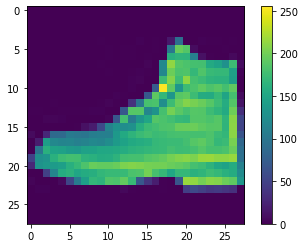

In [227]:
plt.figure()
plt.imshow(train_images[50000])
plt.colorbar()
plt.grid(False)
plt.show()

In [228]:
train_images = train_images / 255.0

test_images = test_images / 255.0

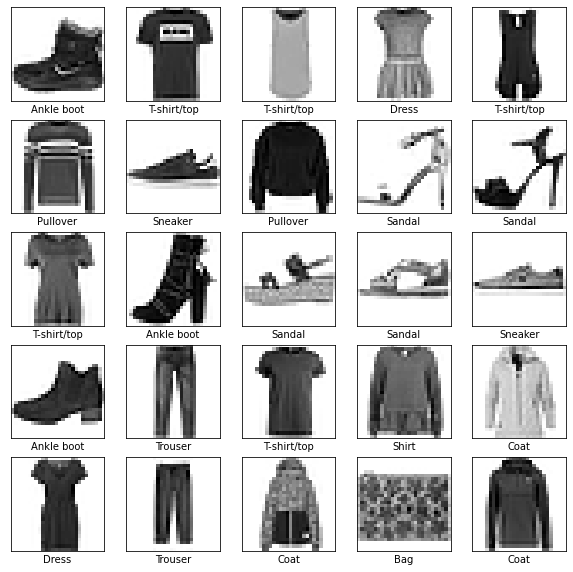

In [229]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [230]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [231]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [232]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.5028 - accuracy: 0.8213
Epoch 2/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3712 - accuracy: 0.8673
Epoch 3/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3331 - accuracy: 0.8788
Epoch 4/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3122 - accuracy: 0.8864
Epoch 5/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2922 - accuracy: 0.8928
Epoch 6/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2790 - accuracy: 0.8960
Epoch 7/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2657 - accuracy: 0.9005
Epoch 8/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2546 - accuracy: 0.9061
Epoch 9/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2441 - accuracy: 0.9101
Epoch 10/10
60

In [233]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3400 - accuracy: 0.8810

Test accuracy: 0.881


In [234]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [235]:
predictions = probability_model.predict(test_images)

In [236]:
predictions[0]

array([2.4351400e-06, 3.3975652e-11, 2.4392597e-09, 9.9056663e-10,
       3.1700369e-09, 1.2051060e-02, 1.3379776e-07, 6.4383200e-03,
       3.7974853e-08, 9.8150808e-01], dtype=float32)

In [237]:
np.argmax(predictions[0])

9

In [238]:
test_labels[0]

9

In [239]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

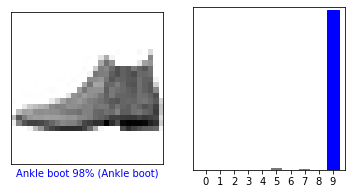

In [240]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

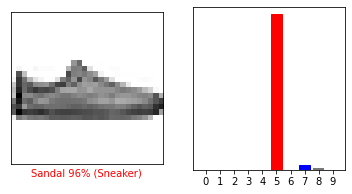

In [241]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

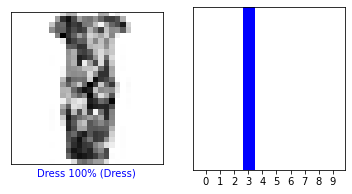

In [242]:
i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

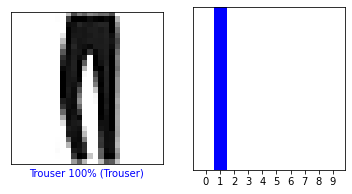

In [243]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

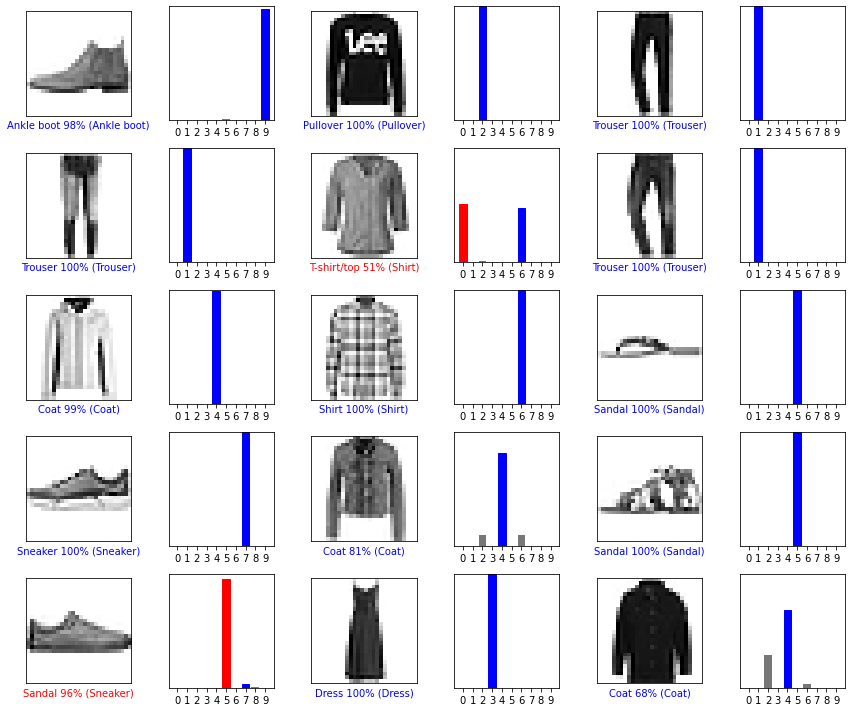

In [244]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [245]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [246]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [247]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.7444950e-04 4.7901441e-14 9.9939096e-01 4.0424117e-09 4.4635588e-05
  3.2700763e-12 1.8989285e-04 1.1732002e-20 3.6132432e-12 2.2272975e-17]]


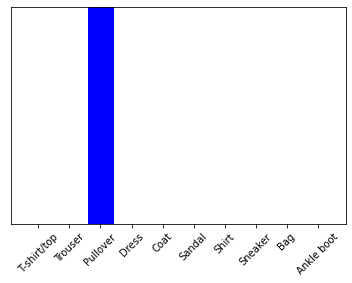

In [248]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [249]:
np.argmax(predictions_single[0])

2

# Experiment #7 Data Augmentation
Add horizontally "flipped versions" of the training images to the training set. How does the validation accuracy of your model change?


output two vectors - the original image and the flipped image. Then average the two vectors to get a single one ~ this gets the highest probability of a given class.  

workflow - 
1. input image is augmented 
2. augmented and original image are forwarded through the model 
3. predictions are aggregated into a final result 

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
# tf.image.flip_up_down(train_images)

# Experiment #4 Change the number of neurons
Look up the model.fit method in the keras docs, and figure out how to change the number of neurons in the hidden layer of your model. Change the number of neurons in your hidden layer to N, where N is in 32, 64, 256, 512. Determine how the validation accuracy depends on N and display your results in a plot or table.

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 32us/sample - loss: 1.9645 - accuracy: 0.5866
Epoch 2/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.8488 - accuracy: 0.6884
Epoch 3/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.7531 - accuracy: 0.7113
Epoch 4/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.6994 - accuracy: 0.7235
Epoch 5/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.6600 - accuracy: 0.7349
Epoch 6/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.6361 - accuracy: 0.7404
Epoch 7/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.6327 - accuracy: 0.7436
Epoch 8/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.6266 - accuracy: 0.7452
Epoch 9/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.6155 - accuracy: 0.7478
Epoch 10/10
60

In [7]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.6398 - accuracy: 0.7410

Test accuracy: 0.741


In [8]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [9]:
predictions = probability_model.predict(test_images)

In [10]:
predictions[0]

array([9.0170016e-18, 3.7686795e-11, 0.0000000e+00, 7.9872520e-10,
       0.0000000e+00, 8.0635443e-02, 0.0000000e+00, 1.2170748e-01,
       1.3952535e-11, 7.9765701e-01], dtype=float32)

In [11]:
np.argmax(predictions[0])

9

In [12]:
test_labels[0]

9